In [3]:

from pandas.plotting import scatter_matrix

'''
DNA and PSY data analysis

'''
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA


path_csv = "./data_analysis.csv"

kg_df = pd.read_csv(path_csv)
samples = kg_df.pop('Sample')


All data from dna samples n = 397
14 scales:
Spontaneous,
Emotional,
Decisive,
Optimist,
Strategic,
Risk-taker,
Sex driven,
Confident,
Calm,
Innovative,
Social,
Stress tolerant,
Bon vivant,
Self aware

Corresponding psychological assessment
big5/ OCEAN
7 scales:
Cooperation,
Leadership,
Openness,
Conscientiousness,
Extraversion,
Agreeableness,
Neuroticism

array([[<Axes: xlabel='dn03', ylabel='dn03'>,
        <Axes: xlabel='dn14', ylabel='dn03'>,
        <Axes: xlabel='ps15', ylabel='dn03'>,
        <Axes: xlabel='ps16', ylabel='dn03'>,
        <Axes: xlabel='ps17', ylabel='dn03'>,
        <Axes: xlabel='ps18', ylabel='dn03'>,
        <Axes: xlabel='ps19', ylabel='dn03'>],
       [<Axes: xlabel='dn03', ylabel='dn14'>,
        <Axes: xlabel='dn14', ylabel='dn14'>,
        <Axes: xlabel='ps15', ylabel='dn14'>,
        <Axes: xlabel='ps16', ylabel='dn14'>,
        <Axes: xlabel='ps17', ylabel='dn14'>,
        <Axes: xlabel='ps18', ylabel='dn14'>,
        <Axes: xlabel='ps19', ylabel='dn14'>],
       [<Axes: xlabel='dn03', ylabel='ps15'>,
        <Axes: xlabel='dn14', ylabel='ps15'>,
        <Axes: xlabel='ps15', ylabel='ps15'>,
        <Axes: xlabel='ps16', ylabel='ps15'>,
        <Axes: xlabel='ps17', ylabel='ps15'>,
        <Axes: xlabel='ps18', ylabel='ps15'>,
        <Axes: xlabel='ps19', ylabel='ps15'>],
       [<Axes: xlabel='dn03', y

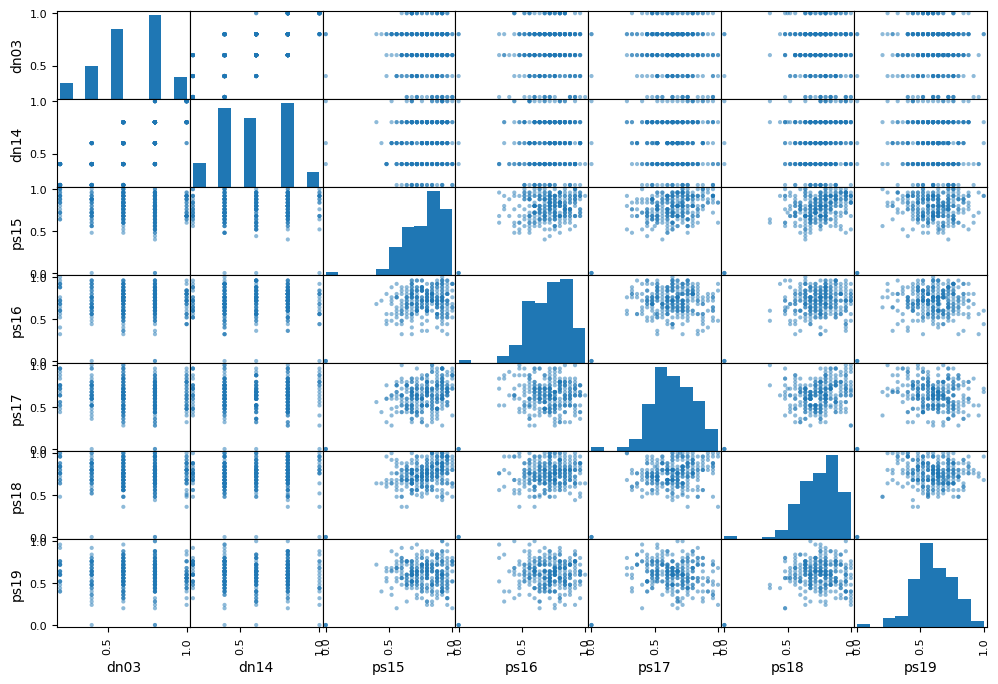

In [4]:
kg_df.columns =['dn01', 'dn02', 'dn03', 'dn04', 'dn05', 'dn06', 'dn07', 'dn08', 'dn09',
       'dn10', 'dn11', 'dn12', 'dn13', 'dn14', 'mp04', 'mp02', 'ps15', 'ps16', 'ps17',
       'ps18', 'ps19']
kg_df = kg_df.div(5)
full_kg_df = kg_df.dropna()

vis_dna = full_kg_df.loc[:, :'dn14']
vis_psy = full_kg_df.loc[:, 'mp04':'ps19']

from pandas.plotting import scatter_matrix
attributes = ['dn03', 'dn14','ps15', 'ps16', 'ps17',
       'ps18', 'ps19']
scatter_matrix(kg_df[attributes], figsize=(12, 8))


In [5]:
pca_1 = PCA(n_components=2)
pca_1.fit(vis_dna)
pca_1.explained_variance_
pca_1.explained_variance_ratio_

x_trans_dna = pca_1.transform(vis_dna)
x_reduced_dna = pca_1.inverse_transform(x_trans_dna)

pca_2 = PCA(n_components=2)
pca_2.fit(vis_psy)
pca_2.explained_variance_
pca_2.explained_variance_ratio_

x_trans_psy = pca_2.transform(vis_psy)
x_reduced_psy = pca_2.inverse_transform(x_trans_psy)

x_trans_psy.shape


(298, 2)

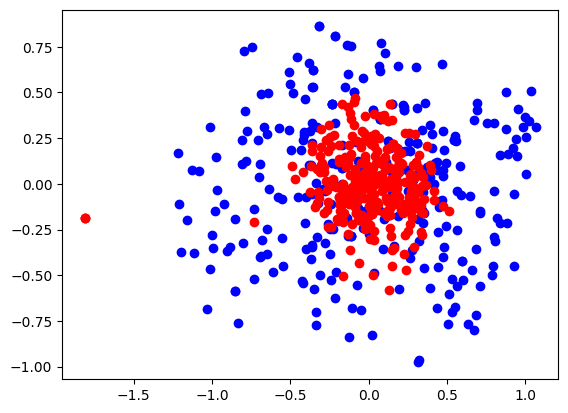

In [6]:
plt.scatter(x_trans_dna[:,[0]], x_trans_dna[:,[1]], c='b')
plt.scatter(x_trans_psy[:,[0]], x_trans_psy[:,[1]], c='r')



data normalized and complete

1. split into train/test
2. remaining dna data without psy data to be used to predict psy values
3. comparing with calculated (kg logics)
4. needed: environmental variable



In [7]:
kg_calc_dna = {}
i = 0
for ps15, ps16, ps17, ps18, ps19 in zip(full_kg_df['ps15'], full_kg_df['ps16'], full_kg_df['ps17'], full_kg_df['ps18'], full_kg_df['ps19']):

   ps01 = (2 * ps15 + (1.2 - ps16) + ps17)/4
   ps02 = (2 * ps15 + ps17)/3
   ps03 = (ps16 + 2 * ps17 +(1.2 - ps18))/4
   ps04 = ((1.2 - ps16) + ps17 + 2 * (1.2 - ps19))/4
   ps05 = (2 * ps16 + (1.2 - ps18))/3
   ps06 = ((1.2-ps16) + 2 * ps17 + (1.2 - ps19))/4
   ps07 = (2 * ps17 + (1.2 - ps19))/3
   ps08 = (2 *(1.2 - ps19) + ps16)/3
   ps09 = (2 * (1.2 - ps19) + (1.2 - ps17) + ps16)/4
   ps10 = (2 * ps15 + (1.2 - ps16) + ps17)/4
   ps11 = (2 * ps18 + (1.2 - ps16))/3
   ps12 = (2 * (1.2 - ps19) + ps16)/3
   ps13 = (2* ps15 + (1.2 - ps16) + ps17 + (1.2 - ps19))/5
   ps14 = (ps15 + ps16)/2

   kg_calc_dna[i] = [ps01, ps02, ps03, ps04, ps05, ps06, ps07, ps08, ps09, ps10, ps11, ps12, ps13, ps14]
   i += 1


In [8]:
calc_df = pd.DataFrame(kg_calc_dna)
calc_df = calc_df.T
calc_df.columns = ['ps01', 'ps02', 'ps03', 'ps04', 'ps05', 'ps06', 'ps07', 'ps08', 'ps09', 'ps10', 'ps11', 'ps12', 'ps13', 'ps14']
calc_df.head()

,ps01,ps02,ps03,ps04,ps05,ps06,ps07,ps08,ps09,ps10,ps11,ps12,ps13,ps14
0,0.53,0.573333,0.56,0.37,0.666667,0.43,0.440000,0.453333,0.51,0.53,0.666667,0.453333,0.480,0.70
1,0.76,0.893333,0.76,0.82,0.626667,0.83,0.986667,0.920000,0.74,0.76,0.786667,0.920000,0.800,0.84
2,0.71,0.773333,0.63,0.69,0.586667,0.68,0.733333,0.733333,0.67,0.71,0.706667,0.733333,0.720,0.74
3,0.88,0.986667,0.70,0.62,0.506667,0.74,0.800000,0.533333,0.46,0.88,0.826667,0.533333,0.800,0.82
4,0.81,0.880000,0.57,0.59,0.480000,0.64,0.653333,0.546667,0.53,0.81,0.840000,0.546667,0.752,0.78


In [9]:
from sklearn.model_selection import train_test_split
X = full_kg_df.loc[:, :'dn14']
Y = calc_df

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (238, 14)
X_test shape: (60, 14)
Y_train shape: (238, 14)
Y_test shape: (60, 14)


In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(14, activation='linear')
])

Y_train = np.argmax(Y_train, axis=1)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(X_train,Y_train, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3032 - loss: 2.6316      
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4189 - loss: 2.5807
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3596 - loss: 2.4869
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4079 - loss: 2.2868
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4149 - loss: 1.9858
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4127 - loss: 1.8719
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4015 - loss: 1.7782
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4078 - loss: 1.6953
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4018 - loss: 1.7138
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4002 - loss: 1.6707
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4081 - loss: 1.7825
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4054 - loss: 1.

In [92]:
results = model.evaluate(X_test, np.argmax(Y_test.values, axis=1), verbose=0)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

Test Loss: 1.6426310539245605
Test Accuracy: 0.4166666567325592
